In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import math

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler


In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, median_absolute_error



In [4]:
#!pip install yellowbrick
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot


In [5]:
chatelet_df = pd.read_csv('chatelet.csv', sep = ';', parse_dates = True)
auber_df = pd.read_csv('auber.csv', sep = ';', parse_dates = True)
roosevelt_df = pd.read_csv('roosevelt.csv', sep = ';', parse_dates = True)


In [6]:
chatelet_df

DATE/HEURE  NO NO2 PM10  CO2  TEMP  HUMI
0      2022-10-10T02:00:00+02:00  ND  ND   43  508  18,2  49,1
1      2022-10-10T01:00:00+02:00  ND  ND   45  529  18,5  48,4
2      2022-10-10T00:00:00+02:00  ND  ND   42  547  18,8  47,1
3      2022-10-09T23:00:00+02:00  ND  ND   59  614  19,1  47,2
4      2022-10-09T22:00:00+02:00  ND  ND   65  637  19,4  46,3
...                          ...  ..  ..  ...  ...   ...   ...
85432  2013-01-01T06:00:00+01:00   4  26  102  622  21,2  45,9
85433  2013-01-01T05:00:00+01:00   3  25   85  715  21,6  45,8
85434  2013-01-01T04:00:00+01:00   4  27  124  799  21,8    47
85435  2013-01-01T03:00:00+01:00   6  30  166  800  21,6  47,3
85436  2013-01-01T02:00:00+01:00   6  31  182  776  21,5  46,2

[85437 rows x 7 columns]

In [7]:
roosevelt_df

date/heure  NO NO2 PM10  CO2  TEMP  HUMI
0      2022-10-10T02:00:00+02:00  33  58   58  522  21,3    44
1      2022-10-10T01:00:00+02:00  53  63   48  540  21,5  43,3
2      2022-10-10T00:00:00+02:00  31  62   39  551  21,6  42,6
3      2022-10-09T23:00:00+02:00  21  63   31  542    21  44,7
4      2022-10-09T22:00:00+02:00  10  48   30  532  20,8  45,2
...                          ...  ..  ..  ...  ...   ...   ...
85432  2013-01-01T06:00:00+01:00  27  57   15  464    15  63,3
85433  2013-01-01T05:00:00+01:00  27  56   22  481  14,9  63,7
85434  2013-01-01T04:00:00+01:00  22  52   45  490  14,9  63,3
85435  2013-01-01T03:00:00+01:00  43  61   18  536  14,9    65
85436  2013-01-01T02:00:00+01:00  23  41   26  612  15,1  65,6

[85437 rows x 7 columns]

In [8]:
auber_df

DATE/HEURE   NO  NO2 PM10 PM2.5  CO2  TEMP  HUMI
0      2022-10-10T02:00:00+02:00   28   56  103    35  509  21,7  43,7
1      2022-10-10T01:00:00+02:00   29   58  108    41  518  21,8  43,1
2      2022-10-10T00:00:00+02:00   28   58  140    52  533    22  42,9
3      2022-10-09T23:00:00+02:00   27   57  113    41  570  22,1  43,1
4      2022-10-09T22:00:00+02:00   15   53  138    49  588  22,4  42,2
...                          ...  ...  ...  ...   ...  ...   ...   ...
84539                        NaN  NaN  NaN  NaN   NaN  NaN   NaN   NaN
84540                        NaN  NaN  NaN  NaN   NaN  NaN   NaN   NaN
84541                        NaN  NaN  NaN  NaN   NaN  NaN   NaN   NaN
84542                        NaN  NaN  NaN  NaN   NaN  NaN   NaN   NaN
84543                        NaN  NaN  NaN  NaN   NaN  NaN   NaN   NaN

[84544 rows x 8 columns]

Questions
Here is a list of relevant questions that can be tackled by analyzing the published data. feel free to ask more
questions or reformulate these ones.
. Predict CO2 level in a selected station from time of day, past values, temperature and humidity.
. Predict NO/NO2/PM10 levels (+PM25 for Auber) in a selected station from past values, temperature
and humidity. Does it help to also consider current CO2 level?
. Compare models for each stations.
. Can current levels in two stations help predict levels in third station?
. Can surface air quality data help predict NO/NO2/PM10/PM25 levels in subway stations?

In [9]:
#chatelet_df['DATE/HEURE'] = chatelet_df['DATE/HEURE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%f%z').astimezone(ZoneInfo('Europe/Paris')).strftime('%I:%M %p'))

In [10]:
#datetime.strptime('2022-02-18T00:00:00.000Z', '%Y-%m-%dT%H:%M:%S.%f%z').astimezone(ZoneInfo('America/New_York')).strftime('%I:%M %p')

In [11]:
chatelet_df.set_index('DATE/HEURE', inplace = True)

In [12]:
chatelet_df = chatelet_df.apply(lambda x: x.replace('ND',np.NaN))
auber_df = auber_df.apply(lambda x: x.replace('ND',np.NaN))
roosevelt_df = roosevelt_df.apply(lambda x: x.replace('ND',np.NaN))

In [13]:
auber_df.dropna(axis = 0, how = 'all', inplace = True)

In [14]:
roosevelt_df.dropna(axis = 0, how = 'all', inplace = True)

In [15]:
auber_df.set_index('DATE/HEURE', inplace = True)


In [16]:
roosevelt_df.set_index('date/heure', inplace = True)


In [17]:
auber_df.columns

Index(['NO', 'NO2', 'PM10', 'PM2.5', 'CO2', 'TEMP', 'HUMI'], dtype='object')

In [18]:
roosevelt_df.columns

Index(['NO', 'NO2', 'PM10', 'CO2', 'TEMP', 'HUMI'], dtype='object')

In [19]:
chatelet_df.isna().sum()

NO      28296
NO2     19504
PM10    15330
CO2     15722
TEMP    10712
HUMI    10711
dtype: int64

<AxesSubplot:ylabel='DATE/HEURE'>

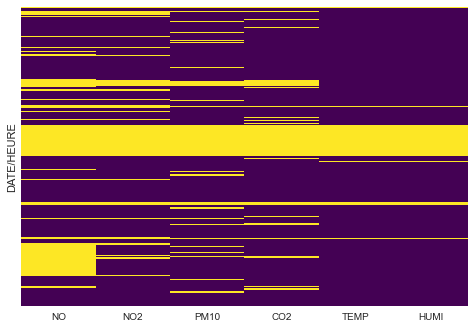

In [20]:
sns.heatmap(chatelet_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
chatelet_df.dropna(axis = 0, how = 'all', inplace = True)

<AxesSubplot:ylabel='DATE/HEURE'>

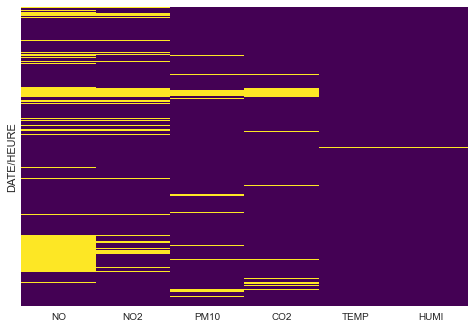

In [22]:
sns.heatmap(chatelet_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:ylabel='DATE/HEURE'>

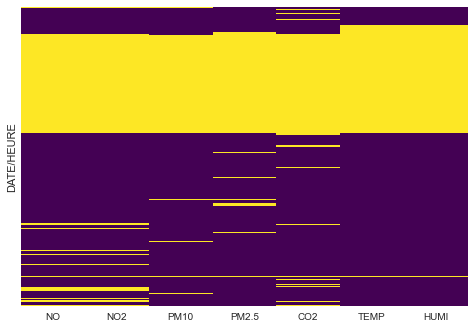

In [23]:
sns.heatmap(auber_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:ylabel='date/heure'>

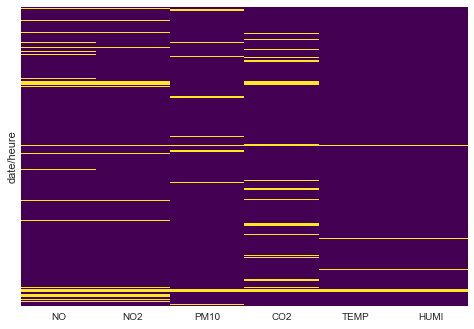

In [24]:
sns.heatmap(roosevelt_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
roosevelt_df.dropna(axis = 0, how = 'all', inplace = True)

<AxesSubplot:ylabel='date/heure'>

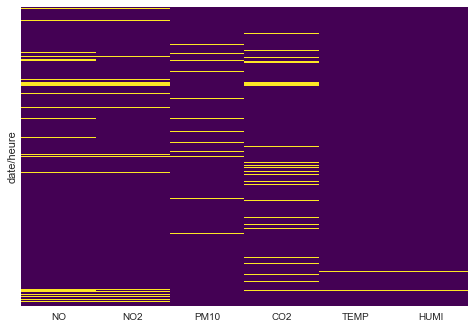

In [26]:
sns.heatmap(roosevelt_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
chatelet_df.fillna(method = 'bfill', inplace = True)

<AxesSubplot:ylabel='DATE/HEURE'>

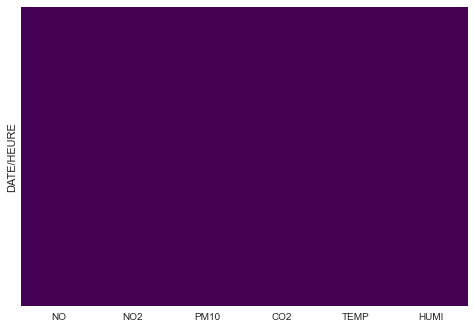

In [28]:
sns.heatmap(chatelet_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
auber_df.fillna(method = 'bfill', inplace = True)

In [30]:
roosevelt_df.fillna(method = 'bfill', inplace = True)

<AxesSubplot:ylabel='date/heure'>

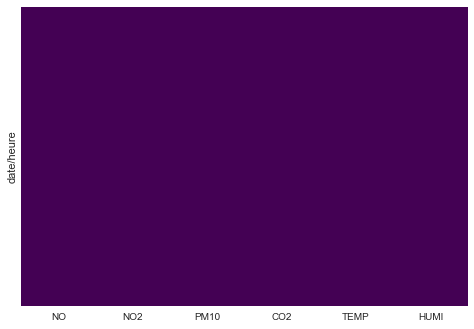

In [31]:
sns.heatmap(roosevelt_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
chatelet_df.dtypes

NO      object
NO2     object
PM10    object
CO2     object
TEMP    object
HUMI    object
dtype: object

In [33]:
chatelet_df['HUMI'] = chatelet_df['HUMI'].apply(lambda x: x.replace(',','.'))
chatelet_df['TEMP'] = chatelet_df['TEMP'].apply(lambda x: x.replace(',','.'))

In [34]:
chatelet_df['TEMP'] = chatelet_df['TEMP'].astype(float)
chatelet_df['HUMI'] = chatelet_df['HUMI'].astype(float)


In [35]:
chatelet_df['NO2'] = chatelet_df['NO2'].apply(lambda x: x.replace('<',''))

In [36]:
chatelet_df['NO2'] = chatelet_df['NO2'].astype(float)


In [37]:
chatelet_df['PM10'] = chatelet_df['PM10'].apply(lambda x: x.replace('>',''))
chatelet_df['PM10'] = chatelet_df['PM10'].apply(lambda x: x.replace('<',''))

In [38]:
chatelet_df['PM10'] = chatelet_df['PM10'].astype(float)


In [39]:
chatelet_df['CO2'] = chatelet_df['CO2'].astype(float)


In [40]:
chatelet_df['NO'] = chatelet_df['NO'].apply(lambda x: x.replace('<',''))

In [41]:
chatelet_df['NO'] = chatelet_df['NO'].astype(float)


In [42]:
chatelet_df

NO   NO2   PM10    CO2  TEMP  HUMI
DATE/HEURE                                                    
2022-10-10T02:00:00+02:00  5.0   7.0   43.0  508.0  18.2  49.1
2022-10-10T01:00:00+02:00  5.0   7.0   45.0  529.0  18.5  48.4
2022-10-10T00:00:00+02:00  5.0   7.0   42.0  547.0  18.8  47.1
2022-10-09T23:00:00+02:00  5.0   7.0   59.0  614.0  19.1  47.2
2022-10-09T22:00:00+02:00  5.0   7.0   65.0  637.0  19.4  46.3
...                        ...   ...    ...    ...   ...   ...
2013-01-01T06:00:00+01:00  4.0  26.0  102.0  622.0  21.2  45.9
2013-01-01T05:00:00+01:00  3.0  25.0   85.0  715.0  21.6  45.8
2013-01-01T04:00:00+01:00  4.0  27.0  124.0  799.0  21.8  47.0
2013-01-01T03:00:00+01:00  6.0  30.0  166.0  800.0  21.6  47.3
2013-01-01T02:00:00+01:00  6.0  31.0  182.0  776.0  21.5  46.2

[74950 rows x 6 columns]

In [43]:
chatelet_df.dtypes

NO      float64
NO2     float64
PM10    float64
CO2     float64
TEMP    float64
HUMI    float64
dtype: object

In [44]:
auber_df.index = pd.to_datetime(auber_df.index, utc = True)


In [45]:
chatelet_df.index = pd.to_datetime(chatelet_df.index, utc = True)


In [46]:
roosevelt_df.index = pd.to_datetime(roosevelt_df.index, utc = True)

In [47]:
chatelet_df

NO   NO2   PM10    CO2  TEMP  HUMI
DATE/HEURE                                                    
2022-10-10 00:00:00+00:00  5.0   7.0   43.0  508.0  18.2  49.1
2022-10-09 23:00:00+00:00  5.0   7.0   45.0  529.0  18.5  48.4
2022-10-09 22:00:00+00:00  5.0   7.0   42.0  547.0  18.8  47.1
2022-10-09 21:00:00+00:00  5.0   7.0   59.0  614.0  19.1  47.2
2022-10-09 20:00:00+00:00  5.0   7.0   65.0  637.0  19.4  46.3
...                        ...   ...    ...    ...   ...   ...
2013-01-01 05:00:00+00:00  4.0  26.0  102.0  622.0  21.2  45.9
2013-01-01 04:00:00+00:00  3.0  25.0   85.0  715.0  21.6  45.8
2013-01-01 03:00:00+00:00  4.0  27.0  124.0  799.0  21.8  47.0
2013-01-01 02:00:00+00:00  6.0  30.0  166.0  800.0  21.6  47.3
2013-01-01 01:00:00+00:00  6.0  31.0  182.0  776.0  21.5  46.2

[74950 rows x 6 columns]

In [48]:
chatelet_df.index = chatelet_df.index.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f%z').astimezone(ZoneInfo('Europe/Paris')).strftime('%I:%M %p'))

AttributeError: 'DatetimeIndex' object has no attribute 'apply'

In [49]:
chatelet_df = chatelet_df.reset_index()
chatelet_df

DATE/HEURE   NO   NO2   PM10    CO2  TEMP  HUMI
0     2022-10-10 00:00:00+00:00  5.0   7.0   43.0  508.0  18.2  49.1
1     2022-10-09 23:00:00+00:00  5.0   7.0   45.0  529.0  18.5  48.4
2     2022-10-09 22:00:00+00:00  5.0   7.0   42.0  547.0  18.8  47.1
3     2022-10-09 21:00:00+00:00  5.0   7.0   59.0  614.0  19.1  47.2
4     2022-10-09 20:00:00+00:00  5.0   7.0   65.0  637.0  19.4  46.3
...                         ...  ...   ...    ...    ...   ...   ...
74945 2013-01-01 05:00:00+00:00  4.0  26.0  102.0  622.0  21.2  45.9
74946 2013-01-01 04:00:00+00:00  3.0  25.0   85.0  715.0  21.6  45.8
74947 2013-01-01 03:00:00+00:00  4.0  27.0  124.0  799.0  21.8  47.0
74948 2013-01-01 02:00:00+00:00  6.0  30.0  166.0  800.0  21.6  47.3
74949 2013-01-01 01:00:00+00:00  6.0  31.0  182.0  776.0  21.5  46.2

[74950 rows x 7 columns]

In [50]:
chatelet_df['date'] = pd.to_datetime(chatelet_df['DATE/HEURE']).dt.date
chatelet_df['time'] = pd.to_datetime(chatelet_df['DATE/HEURE']).dt.time

In [51]:
chatelet_df

DATE/HEURE   NO   NO2   PM10    CO2  TEMP  HUMI  \
0     2022-10-10 00:00:00+00:00  5.0   7.0   43.0  508.0  18.2  49.1   
1     2022-10-09 23:00:00+00:00  5.0   7.0   45.0  529.0  18.5  48.4   
2     2022-10-09 22:00:00+00:00  5.0   7.0   42.0  547.0  18.8  47.1   
3     2022-10-09 21:00:00+00:00  5.0   7.0   59.0  614.0  19.1  47.2   
4     2022-10-09 20:00:00+00:00  5.0   7.0   65.0  637.0  19.4  46.3   
...                         ...  ...   ...    ...    ...   ...   ...   
74945 2013-01-01 05:00:00+00:00  4.0  26.0  102.0  622.0  21.2  45.9   
74946 2013-01-01 04:00:00+00:00  3.0  25.0   85.0  715.0  21.6  45.8   
74947 2013-01-01 03:00:00+00:00  4.0  27.0  124.0  799.0  21.8  47.0   
74948 2013-01-01 02:00:00+00:00  6.0  30.0  166.0  800.0  21.6  47.3   
74949 2013-01-01 01:00:00+00:00  6.0  31.0  182.0  776.0  21.5  46.2   

             date      time  
0      2022-10-10  00:00:00  
1      2022-10-09  23:00:00  
2      2022-10-09  22:00:00  
3      2022-10-09  21:00:00  
4      2022-10-09  20:00:00  
...           ...       ...  
74945  2013-01-01  05:00:00  
74946  2013-01-01  04:00:00  
74947  2013-01-01  03:00:00  
74948  2013-01-01  02:00:00  
74949  2013-01-01  01:00:00  

[74950 rows x 9 columns]

In [52]:
# chatalet_df.loc['2022-10'].head()

In [53]:
# sns.catplot(data = chatelet_df, x = chatelet_df.index, y = 'NO', kind= 'boxen')

<AxesSubplot:>

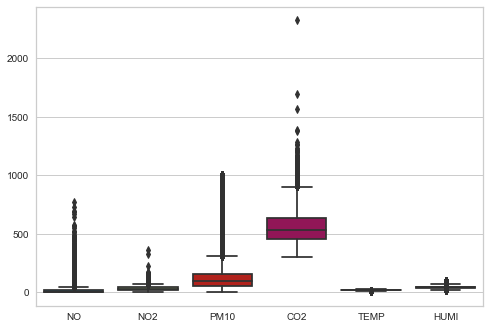

In [54]:
#boxplots, heatmap, line, 
sns.boxplot(data = chatelet_df)

In [55]:
chatelet_df

DATE/HEURE   NO   NO2   PM10    CO2  TEMP  HUMI  \
0     2022-10-10 00:00:00+00:00  5.0   7.0   43.0  508.0  18.2  49.1   
1     2022-10-09 23:00:00+00:00  5.0   7.0   45.0  529.0  18.5  48.4   
2     2022-10-09 22:00:00+00:00  5.0   7.0   42.0  547.0  18.8  47.1   
3     2022-10-09 21:00:00+00:00  5.0   7.0   59.0  614.0  19.1  47.2   
4     2022-10-09 20:00:00+00:00  5.0   7.0   65.0  637.0  19.4  46.3   
...                         ...  ...   ...    ...    ...   ...   ...   
74945 2013-01-01 05:00:00+00:00  4.0  26.0  102.0  622.0  21.2  45.9   
74946 2013-01-01 04:00:00+00:00  3.0  25.0   85.0  715.0  21.6  45.8   
74947 2013-01-01 03:00:00+00:00  4.0  27.0  124.0  799.0  21.8  47.0   
74948 2013-01-01 02:00:00+00:00  6.0  30.0  166.0  800.0  21.6  47.3   
74949 2013-01-01 01:00:00+00:00  6.0  31.0  182.0  776.0  21.5  46.2   

             date      time  
0      2022-10-10  00:00:00  
1      2022-10-09  23:00:00  
2      2022-10-09  22:00:00  
3      2022-10-09  21:00:00  
4      2022-10-09  20:00:00  
...           ...       ...  
74945  2013-01-01  05:00:00  
74946  2013-01-01  04:00:00  
74947  2013-01-01  03:00:00  
74948  2013-01-01  02:00:00  
74949  2013-01-01  01:00:00  

[74950 rows x 9 columns]

In [56]:
chatelet_df['year'] = pd.to_datetime(chatelet_df['date']).dt.year
chatelet_df['hour'] = pd.to_datetime(chatelet_df['DATE/HEURE']).dt.hour
chatelet_df['weekday'] = pd.to_datetime(chatelet_df['date']).dt.weekday

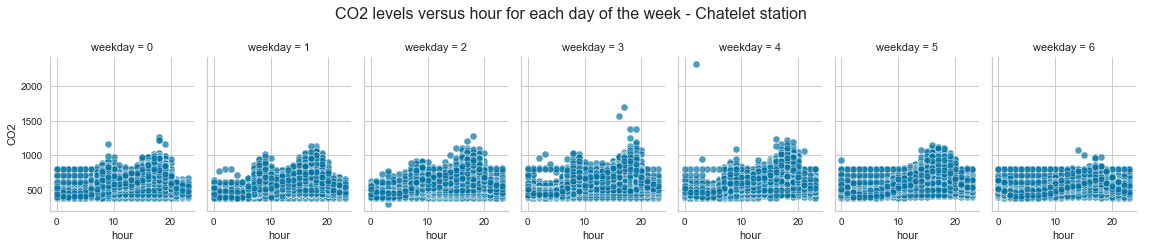

In [57]:
ax = sns.FacetGrid(chatelet_df, col="weekday",  height=3.5, aspect=.65)
ax.map(sns.scatterplot, "hour", "CO2", alpha=.7)
ax.add_legend()
ax.fig.suptitle('CO2 levels versus hour for each day of the week - Chatelet station', fontsize=16)
plt.tight_layout()

# ax = sns.FacetGrid(df_auber, col="weekday",  height=3.5, aspect=.65)
# ax.map(sns.scatterplot, "hour", "CO2", alpha=.7)
# ax.add_legend()
# ax.fig.suptitle('CO2 levels versus hour for each day of the week - Auber station', fontsize=16)
# plt.tight_layout()

# ax = sns.FacetGrid(df_roosevelt, col="weekday",  height=3.5, aspect=.65)
# ax.map(sns.scatterplot, "hour", "CO2", alpha=.7)
# ax.add_legend()
# ax.fig.suptitle('CO2 levels versus hour for each day of the week - F.R. station', fontsize=16)
# plt.tight_layout()


Text(0.5, 8.959999999999987, "['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']")

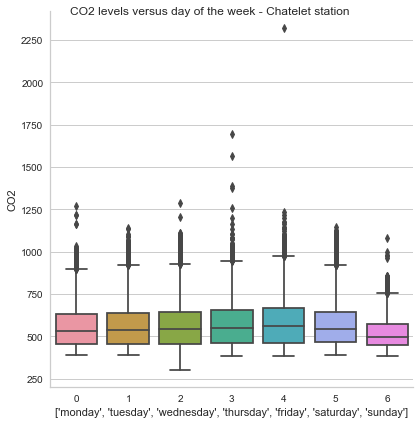

In [58]:
ax = sns.catplot(x="weekday", y="CO2", kind="box", data=chatelet_df, size=6, aspect=1)
ax.fig.suptitle('CO2 levels versus day of the week - Chatelet station', fontsize=12)
plt.xlabel(["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"])

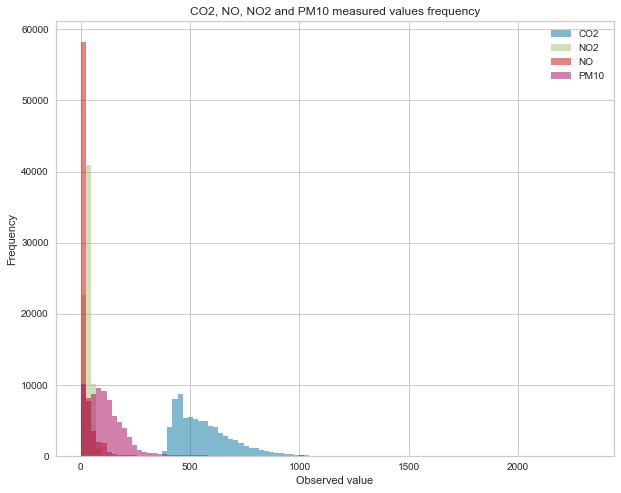

In [59]:
chatelet_df[['CO2', 'NO2', 'NO', 'PM10']].plot(kind='hist', bins=100, grid=True, figsize=(10, 8), alpha=0.5)
plt.title('CO2, NO, NO2 and PM10 measured values frequency')
plt.xlabel('Observed value')
plt.ylabel('Frequency')
plt.show()

In [172]:
# colu = ['CO2', 'NO2', 'NO', 'PM10']
# ax = sns.FacetGrid(chatelet_df, col=colu,  height=3.5, aspect=.65)
# ax.map(sns.histogram, "CO2", alpha=.7)
# ax.add_legend()
# ax.fig.suptitle('CO2 levels versus hour for each day of the week - Chatelet station', fontsize=16)
# plt.tight_layout()

# sns.displot(
#     chatelet_df, x="", col="species", row="sex",
#     binwidth=3, height=3, facet_kws=dict(margin_titles=True),
# )

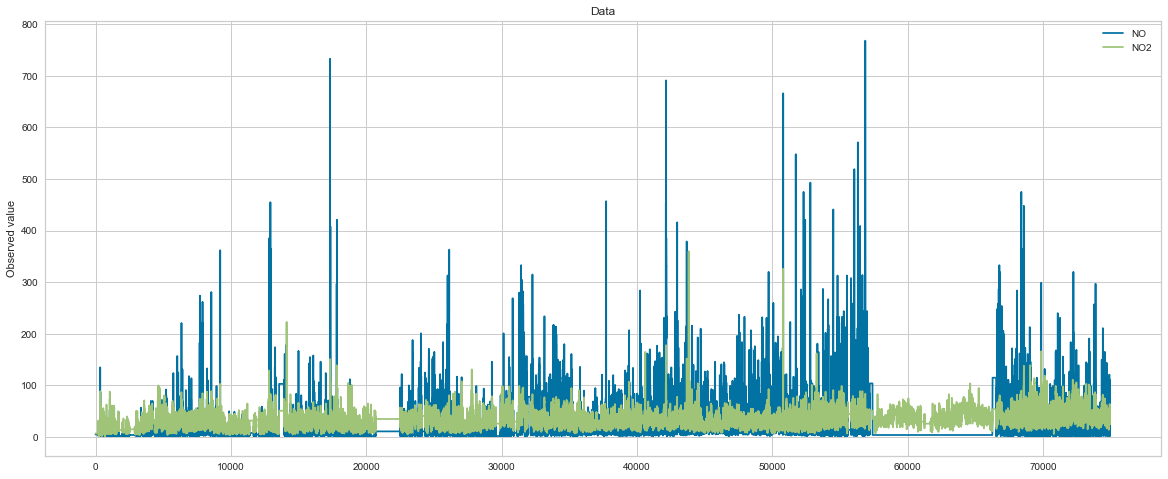

In [181]:
ax = chatelet_df[['NO', 'NO2']].plot(grid=True, figsize=(20, 8), alpha=1)

plt.title('Data')
plt.ylabel('Observed value')
plt.xlabel('')
plt.show();

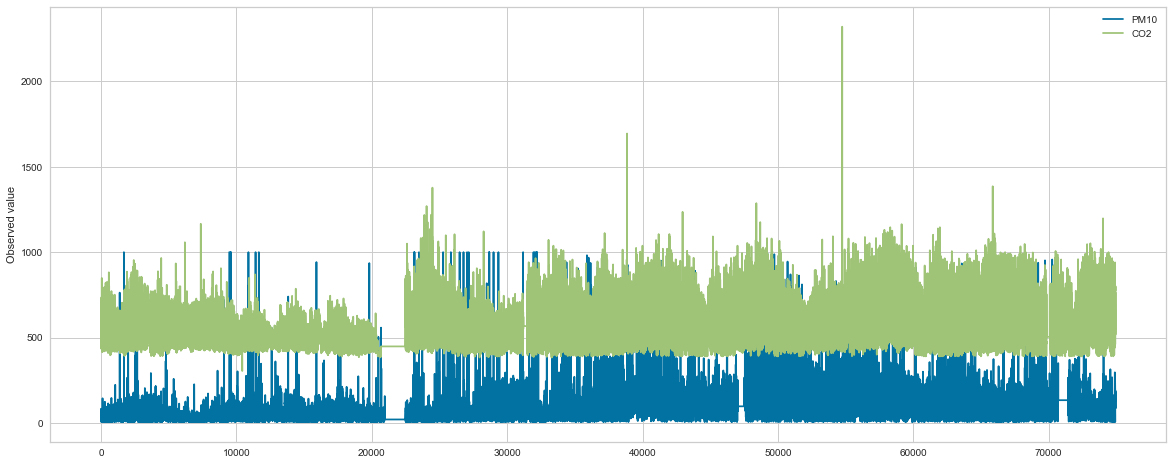

In [189]:
ax = chatelet_df[['PM10', 'CO2']].plot(grid=True, figsize=(20, 8), alpha=1)

plt.ylabel('Observed value')
plt.xlabel('')
plt.show();

In [60]:
chatelet_df

DATE/HEURE   NO   NO2   PM10    CO2  TEMP  HUMI  \
0     2022-10-10 00:00:00+00:00  5.0   7.0   43.0  508.0  18.2  49.1   
1     2022-10-09 23:00:00+00:00  5.0   7.0   45.0  529.0  18.5  48.4   
2     2022-10-09 22:00:00+00:00  5.0   7.0   42.0  547.0  18.8  47.1   
3     2022-10-09 21:00:00+00:00  5.0   7.0   59.0  614.0  19.1  47.2   
4     2022-10-09 20:00:00+00:00  5.0   7.0   65.0  637.0  19.4  46.3   
...                         ...  ...   ...    ...    ...   ...   ...   
74945 2013-01-01 05:00:00+00:00  4.0  26.0  102.0  622.0  21.2  45.9   
74946 2013-01-01 04:00:00+00:00  3.0  25.0   85.0  715.0  21.6  45.8   
74947 2013-01-01 03:00:00+00:00  4.0  27.0  124.0  799.0  21.8  47.0   
74948 2013-01-01 02:00:00+00:00  6.0  30.0  166.0  800.0  21.6  47.3   
74949 2013-01-01 01:00:00+00:00  6.0  31.0  182.0  776.0  21.5  46.2   

             date      time  year  hour  weekday  
0      2022-10-10  00:00:00  2022     0        0  
1      2022-10-09  23:00:00  2022    23        6  
2      2022-10-09  22:00:00  2022    22        6  
3      2022-10-09  21:00:00  2022    21        6  
4      2022-10-09  20:00:00  2022    20        6  
...           ...       ...   ...   ...      ...  
74945  2013-01-01  05:00:00  2013     5        1  
74946  2013-01-01  04:00:00  2013     4        1  
74947  2013-01-01  03:00:00  2013     3        1  
74948  2013-01-01  02:00:00  2013     2        1  
74949  2013-01-01  01:00:00  2013     1        1  

[74950 rows x 12 columns]

In [61]:
chatelet_df[chatelet_df['year']==2015]

DATE/HEURE    NO   NO2   PM10     CO2  TEMP  HUMI  \
48884 2015-12-31 23:00:00+00:00  32.0  37.0  139.0   649.0  23.1  36.1   
48885 2015-12-31 22:00:00+00:00  30.0  33.0  137.0   639.0  23.0  36.2   
48886 2015-12-31 21:00:00+00:00  33.0  41.0  147.0   633.0  23.1  35.2   
48887 2015-12-31 20:00:00+00:00  45.0  41.0  176.0   676.0  23.1  35.9   
48888 2015-12-31 19:00:00+00:00  50.0  44.0  191.0   724.0  23.1  36.5   
...                         ...   ...   ...    ...     ...   ...   ...   
57499 2015-01-01 04:00:00+00:00   4.0  35.0  133.0   881.0  19.8  32.8   
57500 2015-01-01 03:00:00+00:00   4.0  35.0  158.0  1022.0  20.1  33.9   
57501 2015-01-01 02:00:00+00:00   4.0  35.0  158.0   961.0  20.2  33.6   
57502 2015-01-01 01:00:00+00:00   4.0  35.0  143.0   778.0  20.2  32.2   
57503 2015-01-01 00:00:00+00:00   4.0  35.0  125.0   712.0  20.2  31.6   

             date      time  year  hour  weekday  
48884  2015-12-31  23:00:00  2015    23        3  
48885  2015-12-31  22:00:00  2015    22        3  
48886  2015-12-31  21:00:00  2015    21        3  
48887  2015-12-31  20:00:00  2015    20        3  
48888  2015-12-31  19:00:00  2015    19        3  
...           ...       ...   ...   ...      ...  
57499  2015-01-01  04:00:00  2015     4        3  
57500  2015-01-01  03:00:00  2015     3        3  
57501  2015-01-01  02:00:00  2015     2        3  
57502  2015-01-01  01:00:00  2015     1        3  
57503  2015-01-01  00:00:00  2015     0        3  

[8620 rows x 12 columns]

In [62]:
chatelet_df['year'].dtype

dtype('int64')

In [63]:
chatelet_df.groupby(['year']).count()

DATE/HEURE    NO   NO2  PM10   CO2  TEMP  HUMI  date  time  hour  \
year                                                                     
2013        8699  8699  8699  8699  8699  8699  8699  8699  8699  8699   
2014        8747  8747  8747  8747  8747  8747  8747  8747  8747  8747   
2015        8620  8620  8620  8620  8620  8620  8620  8620  8620  8620   
2016        7410  7410  7410  7410  7410  7410  7410  7410  7410  7410   
2017        7837  7837  7837  7837  7837  7837  7837  7837  7837  7837   
2018         945   945   945   945   945   945   945   945   945   945   
2019        8672  8672  8672  8672  8672  8672  8672  8672  8672  8672   
2020        8777  8777  8777  8777  8777  8777  8777  8777  8777  8777   
2021        8550  8550  8550  8550  8550  8550  8550  8550  8550  8550   
2022        6693  6693  6693  6693  6693  6693  6693  6693  6693  6693   

      weekday  
year           
2013     8699  
2014     8747  
2015     8620  
2016     7410  
2017     7837  
2018      945  
2019     8672  
2020     8777  
2021     8550  
2022     6693

In [64]:
grouped_df = chatelet_df[chatelet_df['year'] > 2012]
#lst = []
# for key, item in grouped_df:
#     if key >= 2013 & key < 2016:
#         lst.append(grouped_df.get_group(key))
#         print(grouped_df.get_group(key), "\n\n")

In [65]:
grouped_df = grouped_df[grouped_df['year'] < 2016]

In [66]:
grouped_df

DATE/HEURE    NO   NO2   PM10    CO2  TEMP  HUMI  \
48884 2015-12-31 23:00:00+00:00  32.0  37.0  139.0  649.0  23.1  36.1   
48885 2015-12-31 22:00:00+00:00  30.0  33.0  137.0  639.0  23.0  36.2   
48886 2015-12-31 21:00:00+00:00  33.0  41.0  147.0  633.0  23.1  35.2   
48887 2015-12-31 20:00:00+00:00  45.0  41.0  176.0  676.0  23.1  35.9   
48888 2015-12-31 19:00:00+00:00  50.0  44.0  191.0  724.0  23.1  36.5   
...                         ...   ...   ...    ...    ...   ...   ...   
74945 2013-01-01 05:00:00+00:00   4.0  26.0  102.0  622.0  21.2  45.9   
74946 2013-01-01 04:00:00+00:00   3.0  25.0   85.0  715.0  21.6  45.8   
74947 2013-01-01 03:00:00+00:00   4.0  27.0  124.0  799.0  21.8  47.0   
74948 2013-01-01 02:00:00+00:00   6.0  30.0  166.0  800.0  21.6  47.3   
74949 2013-01-01 01:00:00+00:00   6.0  31.0  182.0  776.0  21.5  46.2   

             date      time  year  hour  weekday  
48884  2015-12-31  23:00:00  2015    23        3  
48885  2015-12-31  22:00:00  2015    22        3  
48886  2015-12-31  21:00:00  2015    21        3  
48887  2015-12-31  20:00:00  2015    20        3  
48888  2015-12-31  19:00:00  2015    19        3  
...           ...       ...   ...   ...      ...  
74945  2013-01-01  05:00:00  2013     5        1  
74946  2013-01-01  04:00:00  2013     4        1  
74947  2013-01-01  03:00:00  2013     3        1  
74948  2013-01-01  02:00:00  2013     2        1  
74949  2013-01-01  01:00:00  2013     1        1  

[26066 rows x 12 columns]

In [67]:
test_df = chatelet_df[chatelet_df['year'] == 2016]

Predict NO/NO2/PM10 levels (+PM25 for Auber) in a selected station from past values, temperature
and humidity. Does it help to also consider current CO2 level?

In [68]:
X=grouped_df[['TEMP', 'HUMI']].values
Y=grouped_df['CO2'].values

In [69]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
model = LinearRegression()

In [72]:
def cross_validation(X, Y):
    score = cross_val_score(LinearRegression(), X, Y,cv=5, scoring="r2")
    print('R_squared Mean Score:',score.mean())
    print(score)

In [73]:
standarddev = chatelet_df['NO2'].std()
print(standarddev)
standarddev_co2 = chatelet_df['CO2'].std()
print(standarddev_co2)

14.822933636861611
127.65762137812668


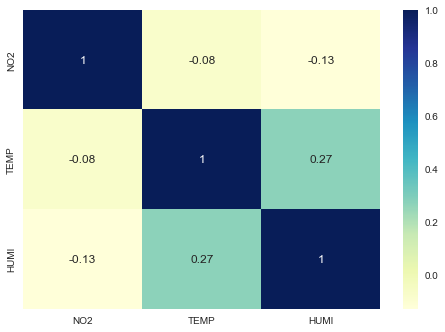

In [74]:
sns.heatmap(grouped_df[['NO2','TEMP','HUMI']].corr(), cmap="YlGnBu", annot = True)
plt.show()

In [76]:
def create_lin_reg(X,Y):
    X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, Y, test_size=0.30, random_state=42)
    X_tr = np.array(X_tr).reshape(-1, 1)
    Y_tr = np.array(Y_tr).reshape(-1, 1)
    X_ts = np.array(X_ts).reshape(-1, 1)
    Y_ts = np.array(Y_ts).reshape(-1, 1)

    #sc_X = StandardScaler()
    #X_tr = sc_X.fit_transform(X_tr)
    #X_ts = sc_X.fit_transform(X_ts)

    # instantiate the regressor class
    lin_reg = LinearRegression()
    # make a prediction set using the test set
    lin_reg.fit(X_tr, Y_tr)
    # make a prediction set using the test set
    y_prediction = lin_reg.predict(X_ts)

    # model evaluation
    mse = mean_squared_error(Y_ts, y_prediction)
    r2 = r2_score(Y_ts, y_prediction)

 
    print('Slope:' ,lin_reg.coef_)
    print('Intercept:', lin_reg.intercept_)
    print("Mean squared error: %.2f" %mse)
    print("Root mean squared error: %.2f" %math.sqrt(mse))
    print('R2 score: ', r2)


    plt.figure(figsize=(12,8))
    #plt.scatter(X_tr.squeeze(), Y_tr,  color='#67c2f7', alpha = 0.4, edgecolor = 'white',marker=".")
    plt.scatter(X_ts.squeeze(), Y_ts,  color='#afef77', alpha = 0.4, edgecolor = 'white', marker=".")
    plt.plot(X_ts, y_prediction, color='#3D88BC', linewidth=2)
    plt.xlabel(X.columns[0])
    plt.ylabel(Y.columns[0])
    plt.title(f'{Y.columns[0]} vs. {X.columns[0]}', fontsize = 14)

    plt.show()


    # Instantiate the linear model and visualizer
    visualizer = ResidualsPlot(lin_reg)

    visualizer.fit(X_tr, Y_tr)  # Fit the training data to the visualizer
    visualizer.score(X_ts, Y_ts)  # Evaluate the model on the test data
    visualizer.show()                 # Finalize and render the figure

In [77]:
df_hours = pd.get_dummies(chatelet_df.hour, prefix='hour')
df_hours.head(5)

df_chatelet_clean_dummie = pd.concat([chatelet_df,df_hours], axis=1)

df_chatelet_clean_dummie.head(5)

DATE/HEURE   NO  NO2  PM10    CO2  TEMP  HUMI        date  \
0 2022-10-10 00:00:00+00:00  5.0  7.0  43.0  508.0  18.2  49.1  2022-10-10   
1 2022-10-09 23:00:00+00:00  5.0  7.0  45.0  529.0  18.5  48.4  2022-10-09   
2 2022-10-09 22:00:00+00:00  5.0  7.0  42.0  547.0  18.8  47.1  2022-10-09   
3 2022-10-09 21:00:00+00:00  5.0  7.0  59.0  614.0  19.1  47.2  2022-10-09   
4 2022-10-09 20:00:00+00:00  5.0  7.0  65.0  637.0  19.4  46.3  2022-10-09   

       time  year  ...  hour_14  hour_15  hour_16  hour_17  hour_18  hour_19  \
0  00:00:00  2022  ...        0        0        0        0        0        0   
1  23:00:00  2022  ...        0        0        0        0        0        0   
2  22:00:00  2022  ...        0        0        0        0        0        0   
3  21:00:00  2022  ...        0        0        0        0        0        0   
4  20:00:00  2022  ...        0        0        0        0        0        0   

   hour_20  hour_21  hour_22  hour_23  
0        0        0        0        0  
1        0        0        0        1  
2        0        0        1        0  
3        0        1        0        0  
4        1        0        0        0  

[5 rows x 36 columns]

Slope: [[-0.26709828]]
Intercept: [51.2163539]
Mean squared error: 222.85
Root mean squared error: 14.93
R2 score:  0.017605094473889027


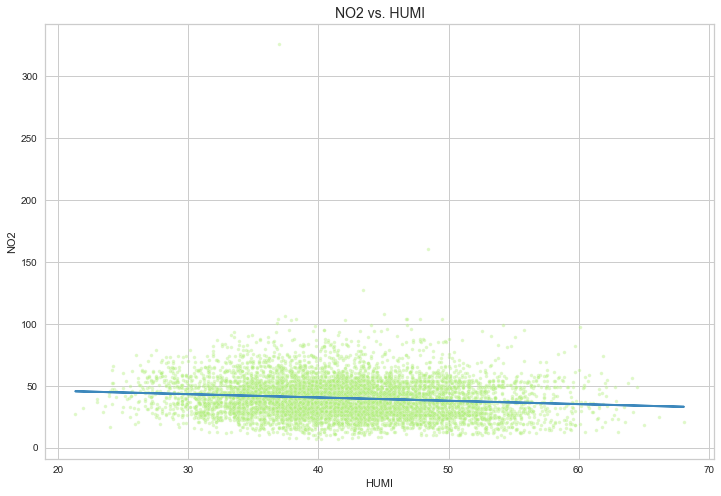

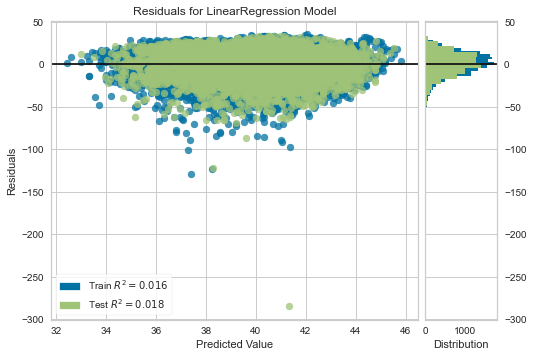

In [78]:
create_lin_reg(grouped_df['HUMI'].to_frame(),grouped_df['NO2'].to_frame())

In [79]:
X_chatelet_no2 = grouped_df[['TEMP','HUMI']]
Y_chatelet_no2 = grouped_df['NO2']

X_tr_chatelet_no2, X_ts_chatelet_no2, Y_tr_chatelet_no2, Y_ts_chatelet_no2 = train_test_split(X_chatelet_no2, Y_chatelet_no2, test_size=0.3, random_state=42)

sc = StandardScaler()
X_tr_chatelet_no2 = sc.fit_transform(X_tr_chatelet_no2)
X_ts_chatelet_no2 = sc.transform (X_ts_chatelet_no2)

In [80]:
# instantiate the regressor class
lin_reg_chatelet_no2 = LinearRegression()

# fit the build the model by fitting the regressor to the training data
lin_reg_chatelet_no2.fit(X_tr_chatelet_no2, Y_tr_chatelet_no2)

# make a prediction set using the test set
y_prediction_chatelet_no2 = lin_reg_chatelet_no2.predict(X_ts_chatelet_no2)

In [81]:
coeff_chatelet_no2 = pd.DataFrame(lin_reg_chatelet_no2.coef_, X_chatelet_no2.columns, columns=['Coefficient'])
print(coeff_chatelet_no2)

      Coefficient
TEMP    -0.687892
HUMI    -1.707545


In [82]:
import plotly.express as px
fig_no2_chatelet = px.bar(
    x=X_chatelet_no2.columns, y=lin_reg_chatelet_no2.coef_, color=['Positive' if c > 0 else 'Negative' for c in lin_reg_chatelet_no2.coef_],
    color_discrete_sequence=['orange', 'blue'],
    labels=dict(x='Feature', y='Linear coefficient'),
    title='Weight of selected features for predicting NO2 in Chatelete '
)
fig_no2_chatelet.show()


       Actual  Predicted
71133    21.0  38.110235
62860    39.0  39.448936
71632    29.0  37.913404
70815    12.0  39.989312
68448    59.0  35.813639
61367    26.0  37.903382
51003    30.0  38.759570
54261    46.0  41.900856
60684    51.0  41.086789
54537    25.0  39.911343


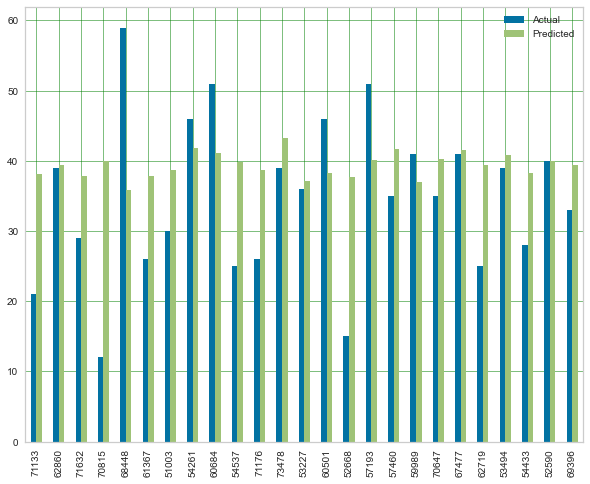

In [83]:
df_pred_act_chatelet_no2 = pd.DataFrame({'Actual': Y_ts_chatelet_no2, 'Predicted': y_prediction_chatelet_no2})
print(df_pred_act_chatelet_no2.head(10))

df_pred_act_chatelet_no2.head(25).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [84]:
# Evaluate the prediction accuracy of the model
print("The Explained Variance: %.2f" % lin_reg_chatelet_no2.score(X_ts_chatelet_no2, Y_ts_chatelet_no2))
print("The Mean Absolute Error: %.2f " % mean_absolute_error(Y_ts_chatelet_no2, y_prediction_chatelet_no2))
print("The Median Absolute Error: %.2f " % median_absolute_error(Y_ts_chatelet_no2, y_prediction_chatelet_no2))

The Explained Variance: 0.02
The Mean Absolute Error: 11.37 
The Median Absolute Error: 9.70 


In [85]:
mse_no2 = mean_squared_error(Y_ts_chatelet_no2, y_prediction_chatelet_no2)
rmse_no2 = math.sqrt(mse_no2)
r2_no2 = r2_score(Y_ts_chatelet_no2, y_prediction_chatelet_no2)
intercept_no2 = lin_reg_chatelet_no2.intercept_

print("Mean squared error: %.2f" %mse_no2)
print("Root mean squared error: %.2f" %rmse_no2)
print("Intercept: %.2f" %intercept_no2)
print("R2 Score: %.2f" %r2_no2)


Mean squared error: 222.28
Root mean squared error: 14.91
Intercept: 39.97
R2 Score: 0.02


In [86]:
cross_validation(X_chatelet_no2,Y_chatelet_no2)

R_squared Mean Score: -0.1368529856814605
[-0.41548465 -0.00109643  0.01623265 -0.11146681 -0.17244969]


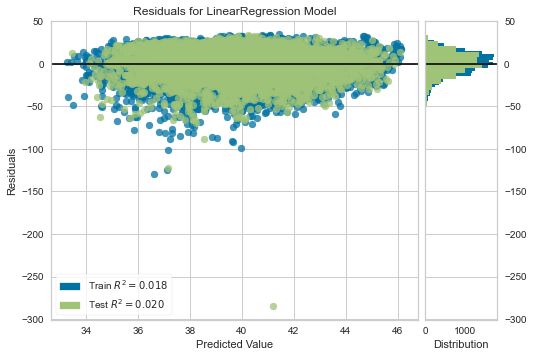

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [87]:
residu_chatelet_no2 = ResidualsPlot(lin_reg_chatelet_no2)

residu_chatelet_no2.fit(X_tr_chatelet_no2, Y_tr_chatelet_no2)  # Fit the training data to the visualizer
residu_chatelet_no2.score(X_ts_chatelet_no2, Y_ts_chatelet_no2)  # Evaluate the model on the test data
residu_chatelet_no2.show()                 # Finalize and render the figure

using co2, now

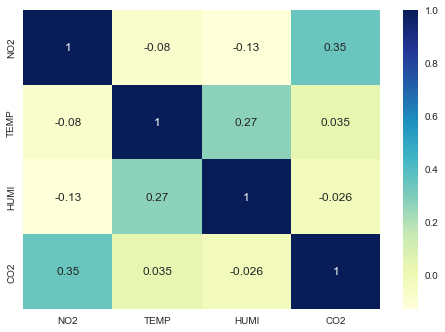

In [88]:
sns.heatmap(grouped_df[['NO2','TEMP','HUMI','CO2']].corr(), cmap="YlGnBu", annot = True)
plt.show()

Slope: [[0.03566195]]
Intercept: [18.40550976]
Mean squared error: 200.73
Root mean squared error: 14.17
R2 score:  0.11511227855230222


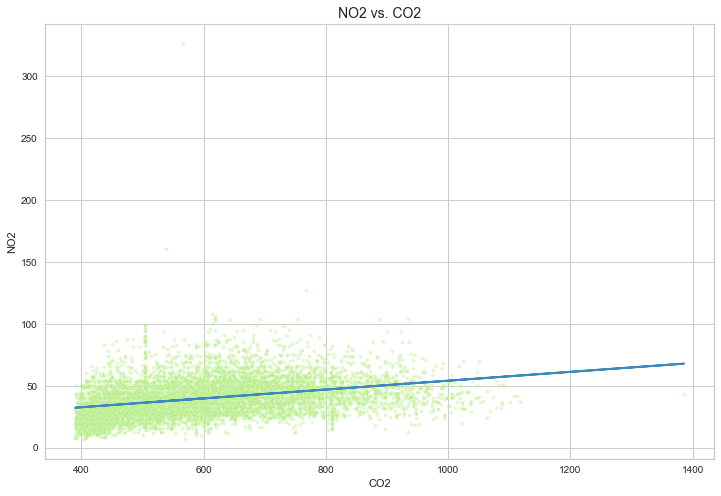

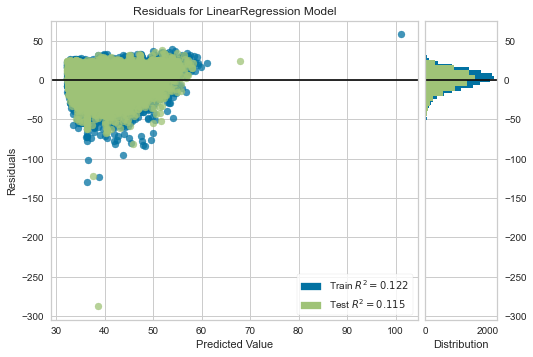

In [89]:
create_lin_reg(grouped_df['CO2'].to_frame(),grouped_df['NO2'].to_frame())

In [90]:
X_chatelet_no2_co2 = grouped_df[['TEMP','HUMI','CO2']]
Y_chatelet_no2_co2 = grouped_df['NO2']
X_tr_chatelet_no2_co2, X_ts_chatelet_no2_co2, Y_tr_chatelet_no2_co2, Y_ts_chatelet_no2_co2 = train_test_split(X_chatelet_no2_co2, Y_chatelet_no2_co2, test_size=0.3, random_state=12)

In [91]:
# instantiate the regressor class
regressor_co2 = LinearRegression()

# fit the build the model by fitting the regressor to the training data
regressor_co2.fit(X_tr_chatelet_no2_co2, Y_tr_chatelet_no2_co2)

# make a prediction set using the test set
y_prediction_chatelet_no2_co2 = regressor_co2.predict(X_ts_chatelet_no2_co2)

In [92]:
coeff_df_co2 = pd.DataFrame(regressor_co2.coef_, X_chatelet_no2_co2.columns, columns=['Coefficient'])
print(coeff_df_co2)

      Coefficient
TEMP    -0.287398
HUMI    -0.205891
CO2      0.035697


       Actual  Predicted
68349    45.0  38.550892
66065    36.0  52.987631
68616    58.0  46.232427
63149    35.0  35.855115
53435    47.0  33.474758
72696    42.0  41.499530
74124    49.0  38.921047
66695    64.0  47.149557
70827    39.0  42.282924
61043    30.0  38.029298


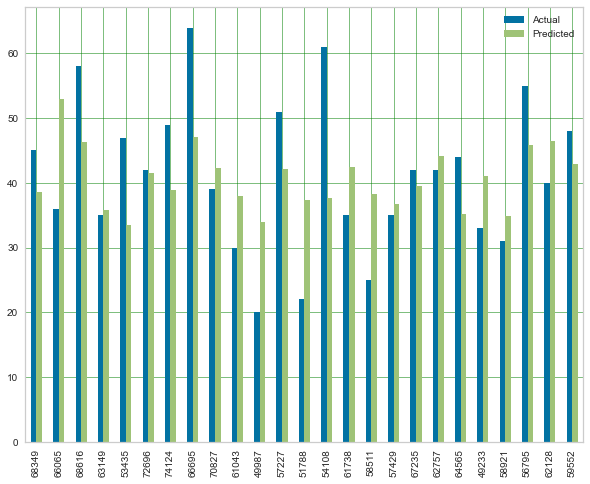

In [93]:
df_pred_act_no2_co2 = pd.DataFrame({'Actual': Y_ts_chatelet_no2_co2, 'Predicted': y_prediction_chatelet_no2_co2})
print(df_pred_act_no2_co2.head(10))

df_pred_act_no2_co2.head(25).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [94]:
# Evaluate the prediction accuracy of the model
print("The Explained Variance: %.2f" % regressor_co2.score(X_ts_chatelet_no2_co2, Y_ts_chatelet_no2_co2))
print("The Mean Absolute Error: %.2f " % mean_absolute_error(Y_ts_chatelet_no2_co2, y_prediction_chatelet_no2_co2))
print("The Median Absolute Error: %.2f " % median_absolute_error(Y_ts_chatelet_no2_co2, y_prediction_chatelet_no2_co2))

The Explained Variance: 0.14
The Mean Absolute Error: 10.36 
The Median Absolute Error: 8.44 


In [95]:
mse = mean_squared_error(Y_ts_chatelet_no2_co2, y_prediction_chatelet_no2_co2)
rmse =  math.sqrt(mse)
r2 = r2_score(Y_ts_chatelet_no2_co2, y_prediction_chatelet_no2_co2)
print(mse)
print(r2)
print(rmse)

192.60770055461018
0.13558657000941388
13.87831764136454


In [96]:
cross_validation(X_chatelet_no2_co2,Y_chatelet_no2_co2)

R_squared Mean Score: -0.02051225796606526
[-0.19839816 -0.02846629  0.07697044  0.0796446  -0.03231189]


In [103]:
chatelet_df

DATE/HEURE   NO   NO2   PM10    CO2  TEMP  HUMI  \
0     2022-10-10 00:00:00+00:00  5.0   7.0   43.0  508.0  18.2  49.1   
1     2022-10-09 23:00:00+00:00  5.0   7.0   45.0  529.0  18.5  48.4   
2     2022-10-09 22:00:00+00:00  5.0   7.0   42.0  547.0  18.8  47.1   
3     2022-10-09 21:00:00+00:00  5.0   7.0   59.0  614.0  19.1  47.2   
4     2022-10-09 20:00:00+00:00  5.0   7.0   65.0  637.0  19.4  46.3   
...                         ...  ...   ...    ...    ...   ...   ...   
74945 2013-01-01 05:00:00+00:00  4.0  26.0  102.0  622.0  21.2  45.9   
74946 2013-01-01 04:00:00+00:00  3.0  25.0   85.0  715.0  21.6  45.8   
74947 2013-01-01 03:00:00+00:00  4.0  27.0  124.0  799.0  21.8  47.0   
74948 2013-01-01 02:00:00+00:00  6.0  30.0  166.0  800.0  21.6  47.3   
74949 2013-01-01 01:00:00+00:00  6.0  31.0  182.0  776.0  21.5  46.2   

             date      time  year  hour  weekday  month  
0      2022-10-10  00:00:00  2022     0        0     10  
1      2022-10-09  23:00:00  2022    23        6     10  
2      2022-10-09  22:00:00  2022    22        6     10  
3      2022-10-09  21:00:00  2022    21        6     10  
4      2022-10-09  20:00:00  2022    20        6     10  
...           ...       ...   ...   ...      ...    ...  
74945  2013-01-01  05:00:00  2013     5        1      1  
74946  2013-01-01  04:00:00  2013     4        1      1  
74947  2013-01-01  03:00:00  2013     3        1      1  
74948  2013-01-01  02:00:00  2013     2        1      1  
74949  2013-01-01  01:00:00  2013     1        1      1  

[74950 rows x 13 columns]

In [101]:

# import torch


# from darts import TimeSeries
# from darts.utils.timeseries_generation import (
#     gaussian_timeseries,
#     linear_timeseries,
#     sine_timeseries,
# )
# from darts.models import (
#     RNNModel,
#     TCNModel,
#     TransformerModel,
#     NBEATSModel,
#     BlockRNNModel,
# )
# from darts.metrics import mape, smape
# from darts.dataprocessing.transformers import Scaler
# from darts.utils.timeseries_generation import datetime_attribute_timeseries
# from darts.datasets import AirPassengersDataset, MonthlyMilkDataset


# # for reproducibility
# torch.manual_seed(1)
# np.random.seed(1)

In [102]:
chatelet_df['month'] = pd.to_datetime(chatelet_df['DATE/HEURE']).dt.month

In [104]:
import statsmodels.api as sm
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [105]:
X = chatelet_df[['hour','CO2']]
#k means

Text(0, 0.5, '$J(C_k)$')

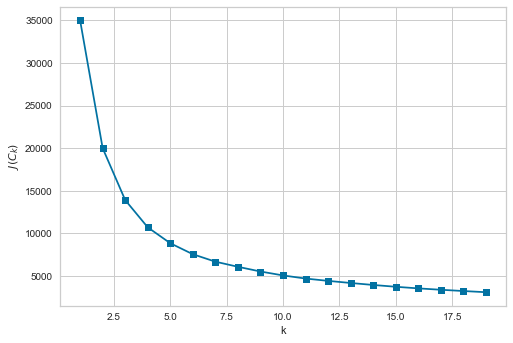

In [111]:
km=[]
for i in range(1,20):
  kmeans = KMeans(i)
  kmeans.fit(X)
   
  km.append(np.sqrt(kmeans.inertia_))

number_clusters = range(1,20)
plt.plot(number_clusters,km, marker = 's')

plt.xlabel('k')
plt.ylabel('$J(C_k)$')

as J(Ck)  decreases significantly until the number of clusters is 6 and then does not change as much anymore. This means that the optimal number of clusters is 6.

In [112]:
kmeans = KMeans(6)
kmeans.fit(X)

KMeans(n_clusters=6)

In [113]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([0, 0, 0, ..., 5, 5, 5])

Text(0, 0.5, 'Level of co2')

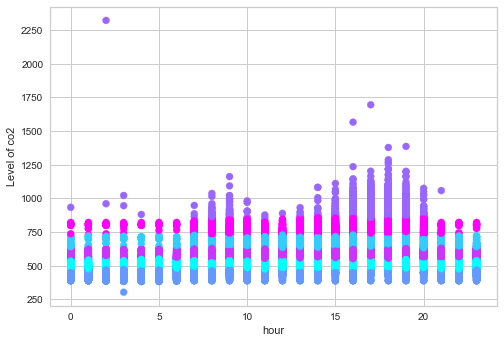

In [118]:
data_with_clusters = chatelet_df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['hour'],data_with_clusters['CO2'], c = data_with_clusters['Clusters'],cmap='cool')
plt.xlabel('hour')
plt.ylabel('Level of co2')

In [122]:
# from tslearn.clustering import TimeSeriesKMeans
# model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10)
# model.fit(X)

In [124]:
# identified_clusters = model.fit_predict(X)
# identified_clusters

In [125]:
X = chatelet_df[['month','CO2']]
#k means

Text(0, 0.5, '$J(C_k)$')

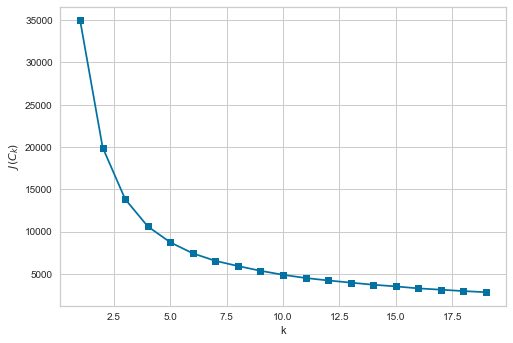

In [126]:
km=[]
for i in range(1,20):
  kmeans = KMeans(i)
  kmeans.fit(X)
   
  km.append(np.sqrt(kmeans.inertia_))

number_clusters = range(1,20)
plt.plot(number_clusters,km, marker = 's')

plt.xlabel('k')
plt.ylabel('$J(C_k)$')

In [127]:
kmeans = KMeans(8)
kmeans.fit(X)

KMeans()

In [128]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([6, 0, 0, ..., 1, 1, 7])

Text(0, 0.5, 'Level of co2')

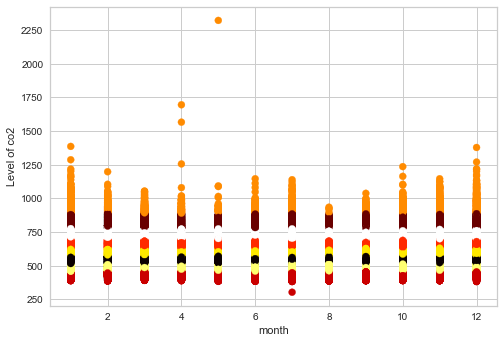

In [129]:
data_with_clusters = chatelet_df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['month'],data_with_clusters['CO2'], c = data_with_clusters['Clusters'],cmap='hot')
plt.xlabel('month')
plt.ylabel('Level of co2')

In [131]:
chatelet_df['day'] = pd.to_datetime(chatelet_df['DATE/HEURE']).dt.day

In [132]:
X = chatelet_df[['day','CO2']]
#k means

Text(0, 0.5, '$J(C_k)$')

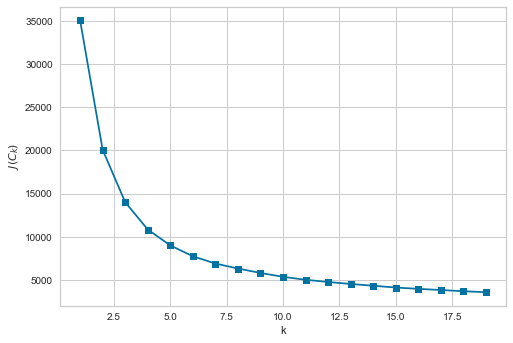

In [133]:
km=[]
for i in range(1,20):
  kmeans = KMeans(i)
  kmeans.fit(X)
   
  km.append(np.sqrt(kmeans.inertia_))

number_clusters = range(1,20)
plt.plot(number_clusters,km, marker = 's')

plt.xlabel('k')
plt.ylabel('$J(C_k)$')

In [134]:
kmeans = KMeans(7)
kmeans.fit(X)

KMeans(n_clusters=7)

In [135]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([4, 4, 2, ..., 1, 1, 1])

Text(0, 0.5, 'Level of co2')

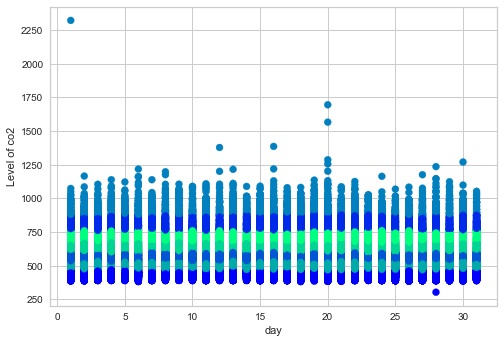

In [137]:
data_with_clusters = chatelet_df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['day'],data_with_clusters['CO2'], c = data_with_clusters['Clusters'],cmap='winter')
plt.xlabel('day')
plt.ylabel('Level of co2')

In [138]:
X = chatelet_df[['weekday','CO2']]
#k means

Text(0, 0.5, '$J(C_k)$')

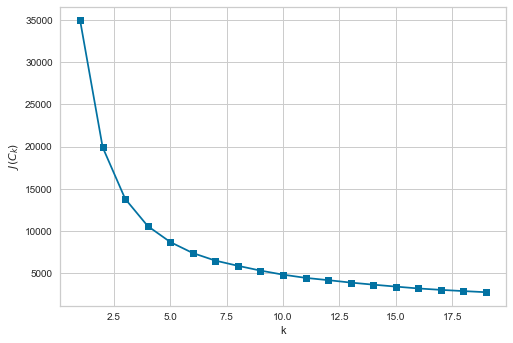

In [139]:
km=[]
for i in range(1,20):
  kmeans = KMeans(i)
  kmeans.fit(X)
   
  km.append(np.sqrt(kmeans.inertia_))

number_clusters = range(1,20)
plt.plot(number_clusters,km, marker = 's')

plt.xlabel('k')
plt.ylabel('$J(C_k)$')

In [140]:
kmeans = KMeans(7)
kmeans.fit(X)

KMeans(n_clusters=7)

In [141]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([3, 3, 2, ..., 5, 5, 5])

Text(0, 0.5, 'Level of co2')

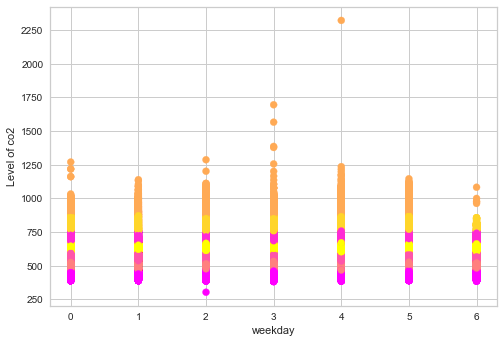

In [142]:
data_with_clusters = chatelet_df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['weekday'],data_with_clusters['CO2'], c = data_with_clusters['Clusters'],cmap='spring')
plt.xlabel('weekday')
plt.ylabel('Level of co2')

In [145]:
X = chatelet_df[['year','CO2']]
#k means

Text(0, 0.5, '$J(C_k)$')

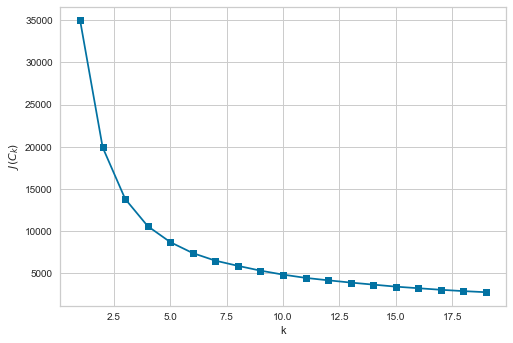

In [146]:
km=[]
for i in range(1,20):
  kmeans = KMeans(i)
  kmeans.fit(X)
   
  km.append(np.sqrt(kmeans.inertia_))

number_clusters = range(1,20)
plt.plot(number_clusters,km, marker = 's')

plt.xlabel('k')
plt.ylabel('$J(C_k)$')

In [150]:
kmeans = KMeans(7)
kmeans.fit(X)

KMeans(n_clusters=7)

In [151]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([5, 2, 2, ..., 0, 0, 0])

Text(0, 0.5, 'Level of co2')

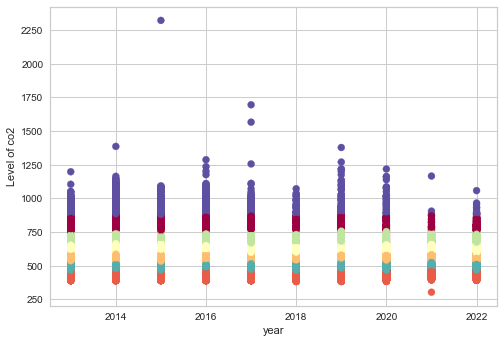

In [153]:
data_with_clusters = chatelet_df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['year'],data_with_clusters['CO2'], c = data_with_clusters['Clusters'],cmap='Spectral')
plt.xlabel('year')
plt.ylabel('Level of co2')